Exploratory Data Analysis – Daily Precipitation (Miami)
Context / Contexto

EN
This notebook performs an exploratory data analysis (EDA) on daily meteorological data for Miami, FL, retrieved from the Open‑Meteo API. The main objective is to understand the statistical and temporal behavior of daily precipitation, and to assess the potential of physical atmospheric variables for predictive modeling.

ES
Este notebook realiza un análisis exploratorio de datos (EDA) sobre datos meteorológicos diarios de Miami, Florida, obtenidos desde la API de Open‑Meteo. El objetivo principal es comprender el comportamiento estadístico y temporal de la precipitación diaria, y evaluar el potencial predictivo de variables físicas atmosféricas.

1. Dataset Overview / Visión general del dataset

EN
We start by loading the dataset and performing basic sanity checks: structure, data types, missing values, and summary statistics.

ES
Comenzamos cargando el dataset y realizando verificaciones básicas: estructura, tipos de datos, valores faltantes y estadísticas descriptivas.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-v0_8")


sns.set(style="whitegrid")


# Load data
DATA_PATH = "../data/raw/open_meteo_miami_daily.csv"

# Parse date
df = pd.read_csv(DATA_PATH, parse_dates=["date"])

df.head()

# Missing values
missing = df.isna().sum()
missing[missing > 0]

# Duplicates
print("Duplicated dates:", df.duplicated(subset=["date"]).sum())

# Basic inspection
df.info()
df.describe()
df.isna().sum()
df.describe()

Duplicated dates: 0
<class 'pandas.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         12784 non-null  str           
 1   temperature_2m_max           12784 non-null  float64       
 2   temperature_2m_min           12784 non-null  float64       
 3   temperature_2m_mean          12784 non-null  float64       
 4   rain_sum                     12784 non-null  float64       
 5   precipitation_sum            12784 non-null  float64       
 6   precipitation_hours          12784 non-null  float64       
 7   wind_speed_10m_max           12784 non-null  float64       
 8   wind_direction_10m_dominant  12784 non-null  int64         
 9   sunrise                      12784 non-null  str           
 10  sunset                       12784 non-null  str           
 11  shortwave_radiation_sum      127

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_sum,precipitation_hours,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,weather_code,date
count,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784
mean,27.183385,22.500626,24.601087,3.114330,3.114330,4.937422,20.607212,142.479506,18.142487,38.555851,2007-07-02 12:00:00
min,9.300000,3.300000,6.300000,0.000000,0.000000,0.000000,5.600000,0.000000,1.130000,0.000000,1990-01-01 00:00:00
25%,25.400000,20.900000,22.900000,0.000000,0.000000,0.000000,15.800000,81.000000,14.250000,3.000000,1998-10-01 18:00:00
50%,27.500000,23.400000,25.200000,0.700000,0.700000,3.000000,19.700000,123.000000,18.350000,51.000000,2007-07-02 12:00:00
75%,29.400000,25.200000,27.100000,3.100000,3.100000,8.000000,24.400000,187.000000,22.510000,55.000000,2016-04-01 06:00:00
max,36.200000,28.800000,30.400000,195.900000,195.900000,24.000000,124.100000,360.000000,29.660000,65.000000,2024-12-31 00:00:00
std,2.934364,3.696749,3.214014,7.160786,7.160786,5.531289,6.557966,86.991696,5.235226,25.017428,NaN


2. Target Variable: Daily Precipitation / Variable objetivo: precipitación diaria

2.1 Distribution

EN
Daily precipitation typically shows a highly skewed distribution, with many zero‑rain days and a long tail of extreme events.

ES
La precipitación diaria suele presentar una distribución altamente asimétrica, con muchos días sin lluvia y una cola larga de eventos extremos.

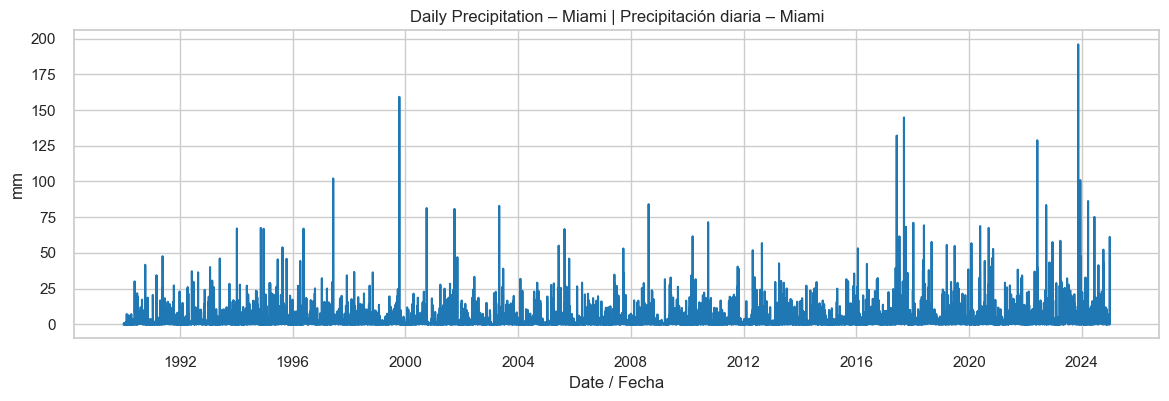

In [18]:
plt.figure(figsize=(14,4))
plt.plot(df["date"], df["precipitation_sum"], color="tab:blue")
plt.title("Daily Precipitation – Miami | Precipitación diaria – Miami")
plt.xlabel("Date / Fecha")
plt.ylabel("mm")
plt.show()

2.2 Temperature

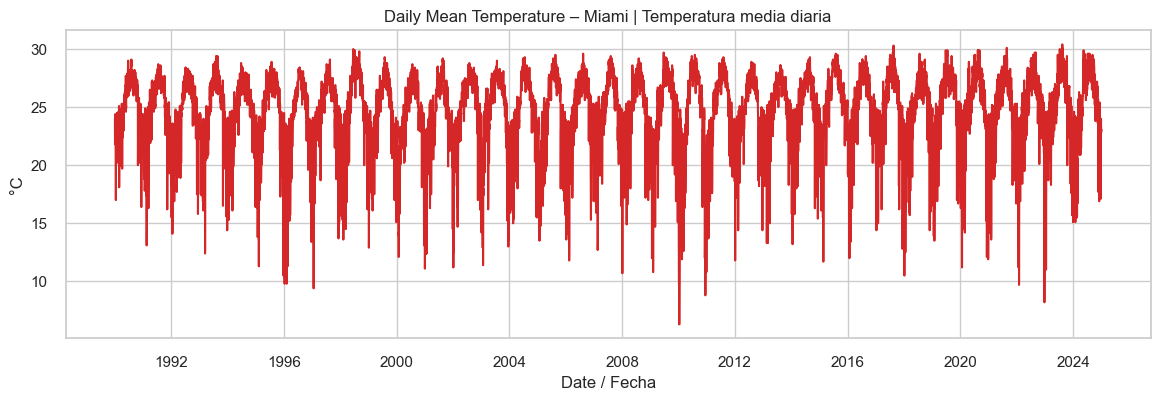

In [19]:
plt.figure(figsize=(14,4))
plt.plot(df["date"], df["temperature_2m_mean"], color="tab:red")
plt.title("Daily Mean Temperature – Miami | Temperatura media diaria")
plt.xlabel("Date / Fecha")
plt.ylabel("°C")
plt.show()

3. Rain vs No‑Rain Days / Días con lluvia vs sin lluvia

EN
We create an auxiliary binary variable to understand how frequent rainy days are.

ES
Creamos una variable binaria auxiliar para entender la frecuencia de días lluviosos.

/Users/alejandroagusti/miniforge3/envs/weather-ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


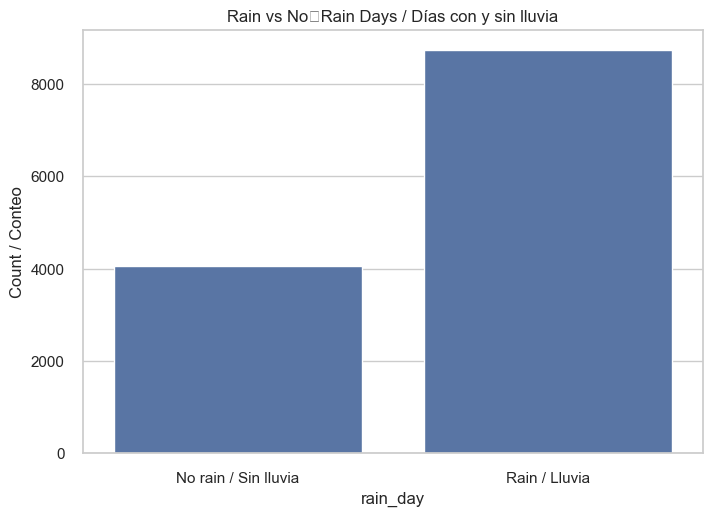

In [20]:
df["rain_day"] = (df["precipitation_sum"] > 0).astype(int)

df["rain_day"].value_counts(normalize=True)

sns.countplot(x="rain_day", data=df)
plt.xticks([0,1], ["No rain / Sin lluvia", "Rain / Lluvia"])
plt.ylabel("Count / Conteo")
plt.title("Rain vs No‑Rain Days / Días con y sin lluvia")
plt.show()

4. Temporal Evolution / Evolución temporal

EN
We inspect how precipitation evolves over time to identify seasonality and extreme events.

ES
Inspeccionamos la evolución temporal de la precipitación para identificar estacionalidad y eventos extremos.

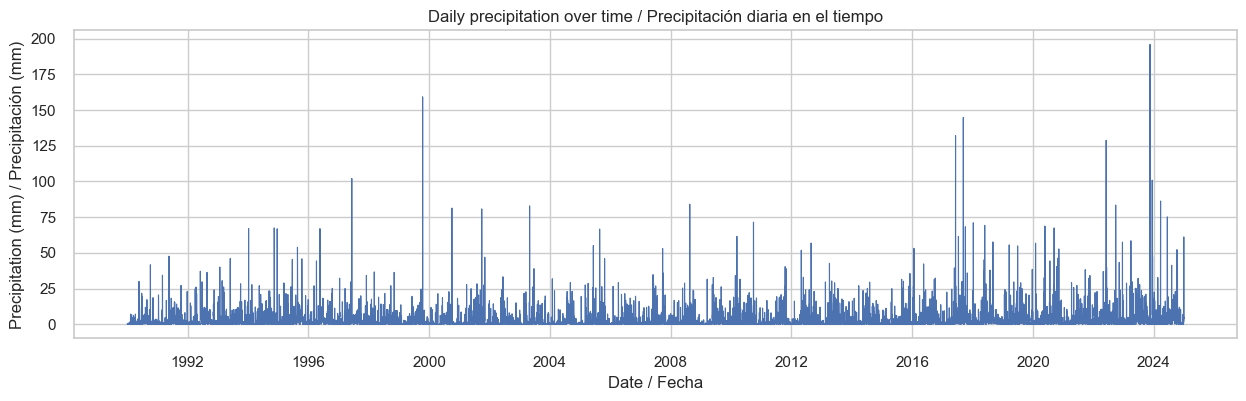

In [21]:
plt.figure(figsize=(15,4))
plt.plot(df["date"], df["precipitation_sum"], linewidth=0.8)
plt.xlabel("Date / Fecha")
plt.ylabel("Precipitation (mm) / Precipitación (mm)")
plt.title("Daily precipitation over time / Precipitación diaria en el tiempo")
plt.show()

5. Seasonality Analysis / Análisis de estacionalidad

EN
Monthly aggregation reveals strong seasonal patterns typical of subtropical climates.

ES
La agregación mensual revela patrones estacionales fuertes típicos de climas subtropicales.

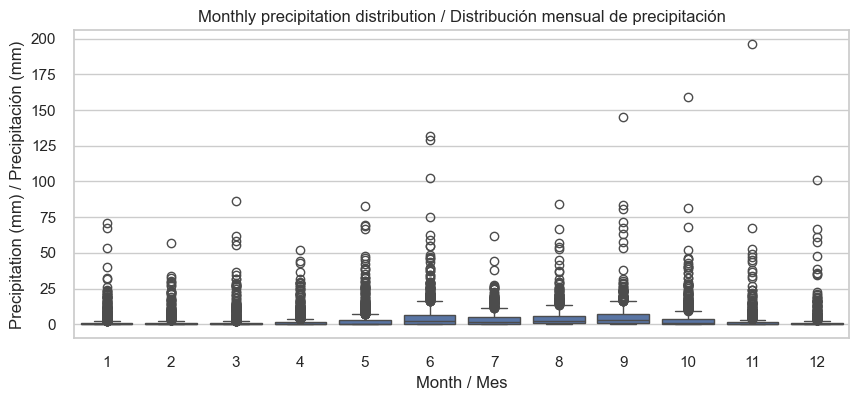

In [22]:
df["month"] = df["date"].dt.month


plt.figure(figsize=(10,4))
sns.boxplot(x="month", y="precipitation_sum", data=df)
plt.xlabel("Month / Mes")
plt.ylabel("Precipitation (mm) / Precipitación (mm)")
plt.title("Monthly precipitation distribution / Distribución mensual de precipitación")
plt.show()

6. Correlation with Physical Variables / Correlación con variables físicas

EN
We evaluate linear correlations between precipitation and selected physical variables.

ES
Evaluamos correlaciones lineales entre la precipitación y variables físicas seleccionadas

In [23]:
# Temperature range
df["temp_range"] = df["temperature_2m_max"] - df["temperature_2m_min"]


# Binary rain indicator (exploratory)
df["is_rain"] = (df["precipitation_sum"] > 0).astype(int)


# Calendar features
df["month"] = df["date"].dt.month
df["dayofyear"] = df["date"].dt.dayofyear




KeyError: 'relative_humidity_2m_mean'

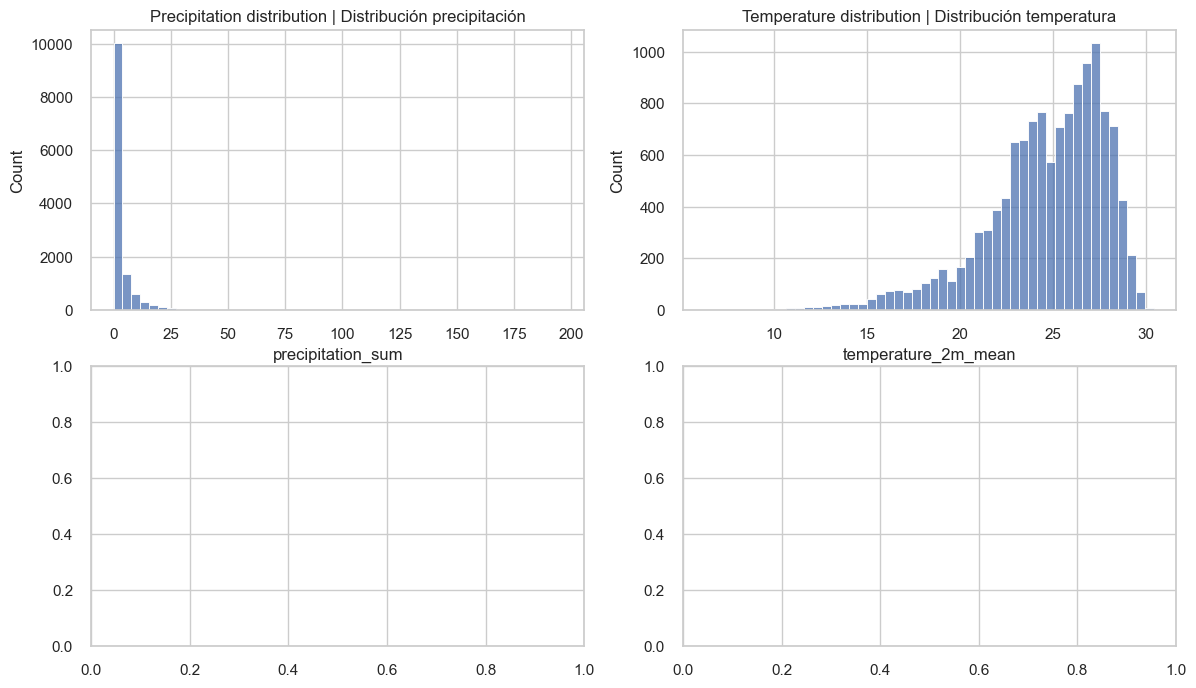

In [24]:
#Distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(14,8))


sns.histplot(df["precipitation_sum"], bins=50, ax=axes[0,0])
axes[0,0].set_title("Precipitation distribution | Distribución precipitación")


sns.histplot(df["temperature_2m_mean"], bins=50, ax=axes[0,1])
axes[0,1].set_title("Temperature distribution | Distribución temperatura")


sns.histplot(df["relative_humidity_2m_mean"], bins=50, ax=axes[1,0])
axes[1,0].set_title("Humidity distribution | Distribución humedad")


sns.histplot(df["wind_speed_10m_mean"], bins=50, ax=axes[1,1])
axes[1,1].set_title("Wind speed distribution | Distribución viento")


plt.tight_layout()
plt.show()

In [ ]:
#Seasonality
monthly_precip = df.groupby("month")["precipitation_sum"].mean()


plt.figure(figsize=(10,4))
monthly_precip.plot(kind="bar")
plt.title("Average monthly precipitation | Precipitación promedio mensual")
plt.xlabel("Month / Mes")
plt.ylabel("mm")
plt.show()

In [ ]:
target = "precipitation_sum"

features = [
    "temperature_2m_mean",
    "relative_humidity_2m_mean",
    "surface_pressure_mean",
    "wind_speed_10m_mean",
    "cloud_cover_mean"
]

features = [f for f in features if f in df.columns]

corr = df[features + [target]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix / Matriz de correlación")
plt.show()

7. EDA Conclusions / Conclusiones del EDA

English summary:
The exploratory data analysis of Miami’s daily precipitation data reveals a skewed distribution with many dry days and fewer heavy rainfall events, strong annual seasonality, and moderate correlation between precipitation and variables such as relative humidity and cloud cover. These insights inform the need for tailored feature engineering and a modeling strategy that captures both the occurrence and intensity of rainfall.

Resumen en español:
El análisis exploratorio de la precipitación diaria en Miami muestra una distribución sesgada con muchos días sin lluvia y pocos con lluvia intensa, una estacionalidad anual marcada y correlaciones moderadas entre precipitación, humedad relativa y cobertura de nubes. Estos hallazgos sugieren estrategias de modelado específicas que consideren tanto la ocurrencia como la magnitud de la lluvia.
